In [160]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor as TreeReg
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from pygam import LinearGAM, LogisticGAM, s, f, l
from sklearn.preprocessing import PowerTransformer, StandardScaler,QuantileTransformer
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error

data = pd.read_csv("praca_hausing.csv")
data = data.drop('zainter', axis = 1)
data

,pietro,izby,powierzchnia,zadrzewienie,autostrada,przemysł,centrum,jezioro,lasy,tramwaj,policja,szkola,cena
0,0,4,65.10,13.44,3153.81100,63.63961,7366.52600,1384.37700,538.56290,472.70500,2996.06800,1324.84000,4531.49
1,3,2,32.70,21.56,8452.07227,134.35030,2818.24414,1601.85046,1471.20703,96.04687,1860.02686,289.87067,1972.32
2,0,3,40.98,1.20,6571.53900,89.44272,2269.05800,1264.80200,798.82730,40.31129,734.20030,261.72500,2037.58
3,3,2,49.53,0.48,11763.63574,207.00241,5615.26953,5416.94092,236.48466,2214.45825,2338.56787,182.48288,5471.43
4,4,3,81.40,21.72,4384.95500,169.18920,2375.39500,3475.80900,2024.84600,317.56890,1301.76800,65.00000,3482.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,25.10,5.20,4261.23535,95.52486,2011.49817,2911.67041,1944.27368,137.93114,483.73547,83.81527,5856.57
996,1,5,118.70,5.04,6369.22700,60.20797,2195.38200,1453.61600,1001.69900,221.35940,533.12760,250.00000,3454.09
997,0,3,43.70,29.64,4216.83500,261.96380,2307.27700,1879.92700,1155.87600,234.20080,1420.95900,219.14610,4736.84
998,3,2,45.70,9.24,4425.45459,61.84658,2693.58496,3260.13794,1907.06580,15.81139,850.00000,435.48822,5689.28


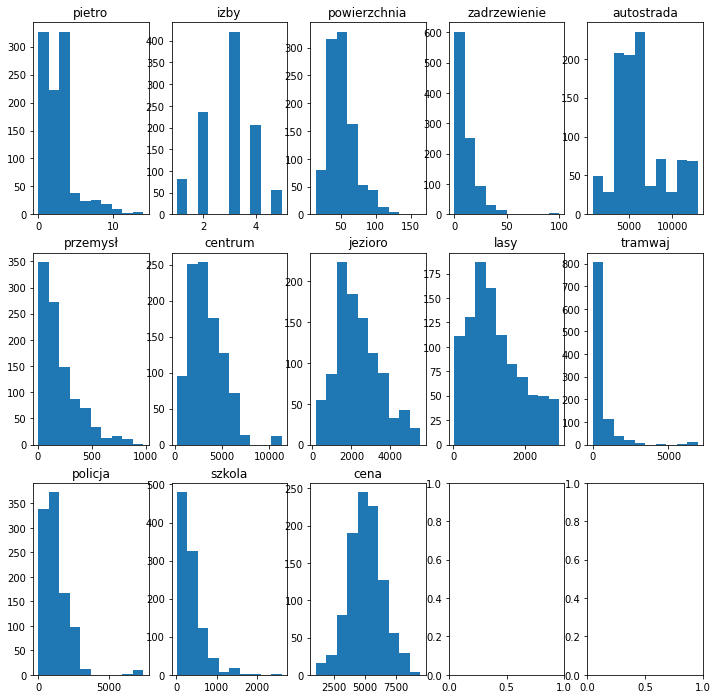

In [161]:
#cena
fig,axes = plt.subplots(3,5,figsize=(12,12))
for column, ax in zip(data.columns,axes.flatten()):
    ax.hist(data[column])
    ax.set_title(column)

In [162]:
from sklearn.linear_model import LinearRegression as ls
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
model_o = ls().fit(X,y)
yhat = model_o.predict(X)
mape_o = mean_absolute_percentage_error(y,yhat)
print(mape_o)

0.22990065197992982


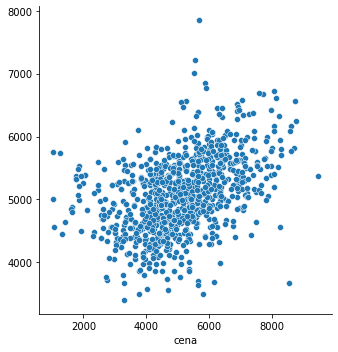

In [163]:
sns.relplot(x=y,y=yhat)

In [164]:
# skalowanie zmiennych
scaler = StandardScaler().fit(data)
scaled = scaler.transform(data)
X = scaled[:,:-1]
y = scaled[:,-1]
model_s = ls().fit(X,y)
yhat = model_s.predict(X)
mape_s = mean_absolute_percentage_error(y,yhat)
print(mape_s)

2.0167656034134818


In [165]:
# transformacja potęgowa
transformer_p = PowerTransformer().fit(data)
transformed = transformer_p.transform(data)
X = transformed[:,:-1]
y = transformed[:,-1]
model_p = ls().fit(X,y)
yhat = model_p.predict(X)
mape_p = mean_absolute_percentage_error(y,yhat)
print(mape_p)

2.5603643598629278


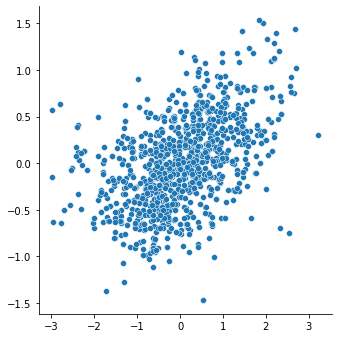

In [166]:
sns.relplot(x=y,y=yhat)

In [167]:
list(zip(data.columns,transformer_p.lambdas_))

[('pietro', 0.11069846268637817),
 ('izby', 0.9450689208747795),
 ('powierzchnia', -0.2014906673742822),
 ('zadrzewienie', 0.13221552944831869),
 ('autostrada', 0.37189806037111217),
 ('przemysł', 0.13014354026579342),
 ('centrum', 0.47472791762181793),
 ('jezioro', 0.4739254075445473),
 ('lasy', 0.49507571663499433),
 ('tramwaj', 0.014932895478343772),
 ('policja', 0.30888091363736825),
 ('szkola', 0.1433135963961169),
 ('cena', 0.9915932783757752)]

In [168]:
transformer_q = QuantileTransformer().fit(data)
transformed = transformer_q.transform(data)
X = transformed[:,:-1]
y = transformed[:,-1]
model_q = ls().fit(X,y)
yhat = model_q.predict(X)
mae_q = mean_absolute_error(y,yhat)
print(mae_q)

0.20607738522077096


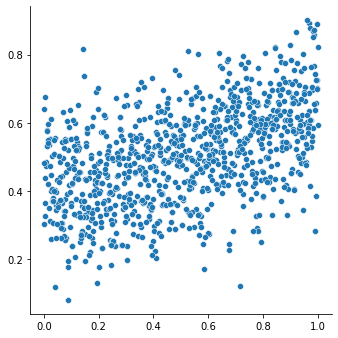

In [169]:
sns.relplot(x=y,y=yhat)

In [170]:
coefs = pd.DataFrame((model_o.coef_,model_s.coef_,model_p.coef_,model_q.coef_),columns=data.columns[:-1])
coefs = coefs.T
coefs.columns=["Ord","scaled","GLS-YJ", "GLS-Q"]
coefs

,Ord,scaled,GLS-YJ,GLS-Q
pietro,-29.312115,-0.047814,-0.028141,-0.036650
izby,-187.251246,-0.136383,-0.096654,-0.103418
powierzchnia,-9.762576,-0.141210,-0.188208,-0.213436
zadrzewienie,-14.176849,-0.116925,-0.157391,-0.186083
autostrada,0.069186,0.141327,0.070172,0.083430
przemysł,1.039137,0.130839,0.186727,0.186273
centrum,-0.003658,-0.004837,-0.078649,0.093465
jezioro,-0.157398,-0.131396,-0.115366,-0.137458
lasy,0.072115,0.039111,0.020551,0.140957
tramwaj,0.019204,0.012231,0.145458,0.090324


In [171]:
#1 Zależności liniowe - cena
#Zmienne piętro, izby, powierzchnia, zadrzewienie, przemysł oraz szkola znacząco zmniejszają wpływ na cenę po dokonaniu skalowania oraz transformacji.

In [172]:
#5 Zwyzka i obnizka ceny
#Obnizaja cene: pietro, izba, powierzchnia, zadrzewienie, centrum, jezioro, policja
#Zawyzaja cene: autostrada, przemysl, lasy, tramwaj, szkola

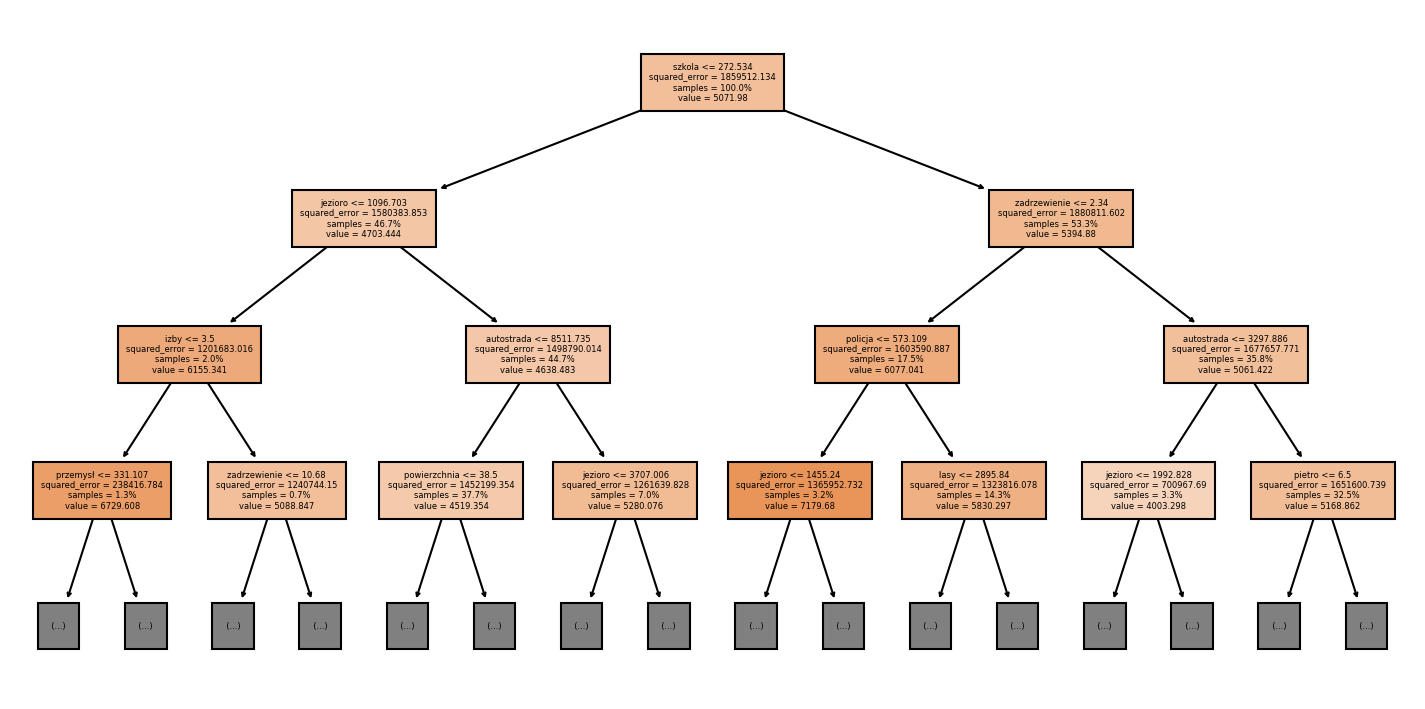

In [173]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
model = TreeReg(max_depth=6).fit(X,y)
fig,ax=plt.subplots(figsize=(12,6),dpi=150)
ann = tree.plot_tree(model,feature_names=X.columns,ax=ax,filled=True,max_depth=3,fontsize=4,proportion=True) 

In [174]:
column_names = ['pietro', 'izby', 'powierzchnia', 'zadrzewienie', 'autostrada', 'przemysł', 'centrum', 'jezioro', 'lasy', 'tramwaj', 'policja','szkola']
df = pd.DataFrame(model.feature_importances_.reshape(1, -1), columns=column_names)
df

,pietro,izby,powierzchnia,zadrzewienie,autostrada,przemysł,centrum,jezioro,lasy,tramwaj,policja,szkola
0,0.039935,0.013635,0.121104,0.142752,0.083337,0.001422,0.050528,0.155501,0.059701,0.071362,0.108797,0.151925


In [175]:
#3 Zmienne o malej przydatnosci dla modelu liniowego ceny: pietro, izby, przemysl, centrum, lasy

In [176]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
gam = LinearGAM(s(0,n_splines=10) + s(1,n_splines=10) + s(2,n_splines=5) + s(3,n_splines=5) + s(4,n_splines=5) + s(5,n_splines=4) + s(6,n_splines=10) + s(7,n_splines=10), fit_intercept=True)
gam = LinearGAM()
gam.fit(X, y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    111.0878
Link Function:                     IdentityLink Log Likelihood:                                -14877.9258
Number of Samples:                         1000 AIC:                                            29980.0272
                                                AICc:                                           30008.6112
                                                GCV:                                          1438779.0448
                                                Scale:                                        1154279.5259
                                                Pseudo R-Squared:                                   0.4482
Feature Function                  Lam

<ipython-input-176-bb31ad4a0ac3>:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


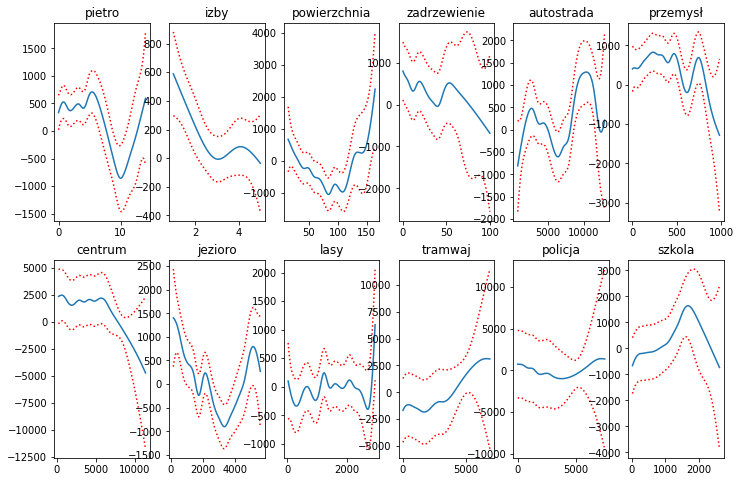

In [177]:
fig, axes = plt.subplots(2,6,figsize=(12,8))
for t, ax in zip(range(12),axes.flatten()):
    XX = gam.generate_X_grid(term=t)
    pdp, confi = gam.partial_dependence(term=t, X=XX, width=0.95)
    ax.plot(XX.T[t],pdp)
    ax.plot(XX.T[t],confi,c="r",ls=":")
    ax.set_title(X.columns[t])

In [178]:
#4 Zmienne zachowujace sie nieliniowo - cena: pietro, powierzchnia, zadrzewienie, autostrada, przemysl, jezioro, lasy, szkola.

In [179]:
#zainter
data = pd.read_csv("praca_hausing.csv")
data

,pietro,izby,powierzchnia,zadrzewienie,autostrada,przemysł,centrum,jezioro,lasy,tramwaj,policja,szkola,cena,zainter
0,0,4,65.10,13.44,3153.81100,63.63961,7366.52600,1384.37700,538.56290,472.70500,2996.06800,1324.84000,4531.49,False
1,3,2,32.70,21.56,8452.07227,134.35030,2818.24414,1601.85046,1471.20703,96.04687,1860.02686,289.87067,1972.32,True
2,0,3,40.98,1.20,6571.53900,89.44272,2269.05800,1264.80200,798.82730,40.31129,734.20030,261.72500,2037.58,True
3,3,2,49.53,0.48,11763.63574,207.00241,5615.26953,5416.94092,236.48466,2214.45825,2338.56787,182.48288,5471.43,False
4,4,3,81.40,21.72,4384.95500,169.18920,2375.39500,3475.80900,2024.84600,317.56890,1301.76800,65.00000,3482.80,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,25.10,5.20,4261.23535,95.52486,2011.49817,2911.67041,1944.27368,137.93114,483.73547,83.81527,5856.57,False
996,1,5,118.70,5.04,6369.22700,60.20797,2195.38200,1453.61600,1001.69900,221.35940,533.12760,250.00000,3454.09,True
997,0,3,43.70,29.64,4216.83500,261.96380,2307.27700,1879.92700,1155.87600,234.20080,1420.95900,219.14610,4736.84,False
998,3,2,45.70,9.24,4425.45459,61.84658,2693.58496,3260.13794,1907.06580,15.81139,850.00000,435.48822,5689.28,False


In [180]:
#2 Czy wszystkie zmienne wyjaśniające powinny być numeryczne?


#Nie, ponieważ zmienne piętro oraz izby powinny być to zmienne kategoryczne (np. nie może być piętra 3.25)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

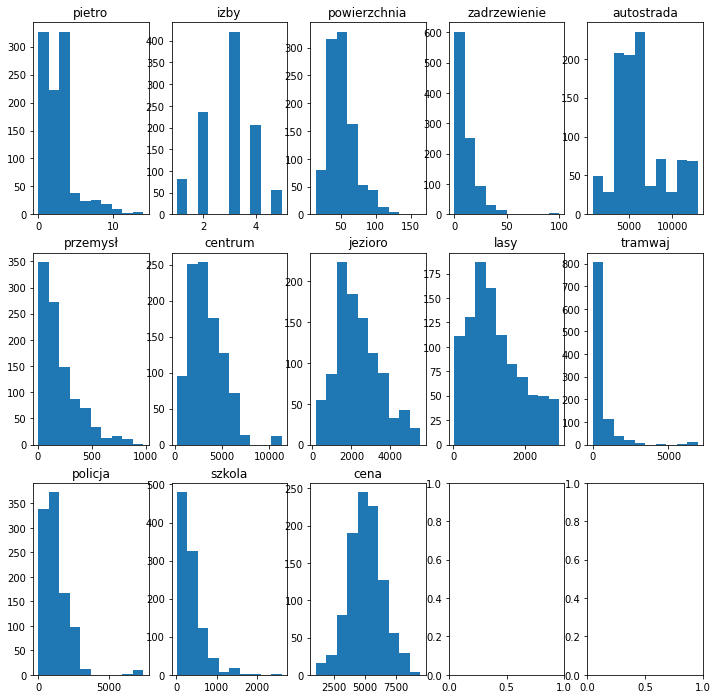

In [181]:
fig,axes = plt.subplots(3,5,figsize=(12,12))
for column, ax in zip(data.columns,axes.flatten()):
    ax.hist(data[column])
    ax.set_title(column)

In [ ]:
from sklearn.linear_model import LinearRegression as ls
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
model_o = ls().fit(X,y)
yhat = model_o.predict(X)
mape_o = mean_absolute_percentage_error(y,yhat)
print(mape_o)

692388806576408.8


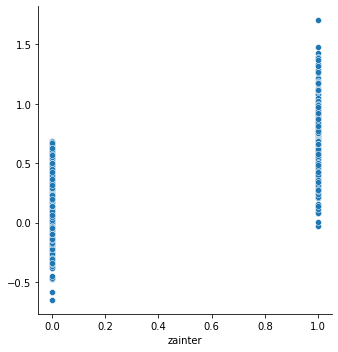

In [ ]:
sns.relplot(x=y,y=yhat)

In [ ]:
# skalowanie zmiennych
scaler = StandardScaler().fit(data)
scaled = scaler.transform(data)
X = scaled[:,:-1]
y = scaled[:,-1]
model_s = ls().fit(X,y)
yhat = model_s.predict(X)
mape_s = mean_absolute_percentage_error(y,yhat)
print(mape_s)

0.6243204940074892


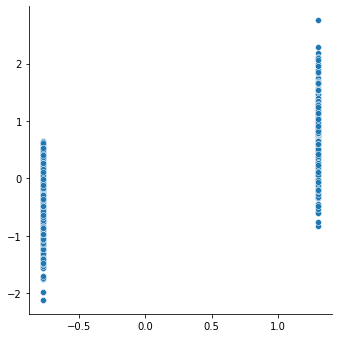

In [ ]:
sns.relplot(x=y,y=yhat)

In [ ]:
# transformacja potęgowa
transformer_p = PowerTransformer().fit(data)
transformed = transformer_p.transform(data)
X = transformed[:,:-1]
y = transformed[:,-1]
model_p = ls().fit(X,y)
yhat = model_p.predict(X)
mape_p = mean_absolute_percentage_error(y,yhat)
print(mape_p)

0.6351021178888117


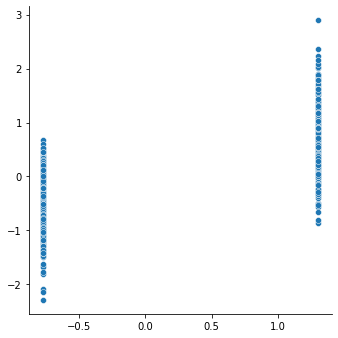

In [ ]:
sns.relplot(x=y,y=yhat)

In [ ]:
list(zip(data.columns,transformer_p.lambdas_))

[('pietro', 0.11069846268637817),
 ('izby', 0.9450689208747795),
 ('powierzchnia', -0.2014906673742822),
 ('zadrzewienie', 0.13221552944831869),
 ('autostrada', 0.37189806037111217),
 ('przemysł', 0.13014354026579342),
 ('centrum', 0.47472791762181793),
 ('jezioro', 0.4739254075445473),
 ('lasy', 0.49507571663499433),
 ('tramwaj', 0.014932895478343772),
 ('policja', 0.30888091363736825),
 ('szkola', 0.1433135963961169),
 ('cena', 0.9915932783757752),
 ('zainter', -2.308892689565723)]

In [ ]:
transformer_q = QuantileTransformer().fit(data)
transformed = transformer_q.transform(data)
X = transformed[:,:-1]
y = transformed[:,-1]
model_q = ls().fit(X,y)
yhat = model_q.predict(X)
mae_q = mean_absolute_error(y,yhat)
print(mae_q)

0.2716756557921283


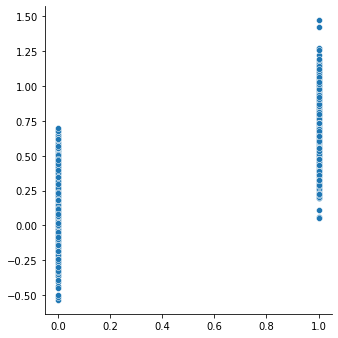

In [ ]:
sns.relplot(x=y,y=yhat)

In [ ]:
coefs = pd.DataFrame((model_o.coef_,model_s.coef_,model_p.coef_,model_q.coef_),columns=data.columns[:-1])
coefs = coefs.T
coefs.columns=["Ord","scaled","GLS-YJ", "GLS-Q"]
coefs

,Ord,scaled,GLS-YJ,GLS-Q
pietro,0.014030,0.064567,0.064645,0.077907
izby,-0.267640,-0.549964,-0.489285,-0.760955
powierzchnia,0.005841,0.238344,0.151184,0.139685
zadrzewienie,-0.003904,-0.090834,-0.075465,-0.152997
autostrada,0.000015,0.084548,0.091457,0.180028
przemysł,0.000147,0.052085,0.035907,0.062611
centrum,0.000006,0.021908,-0.021809,0.000714
jezioro,-0.000060,-0.140880,-0.103871,-0.171985
lasy,0.000023,0.034808,0.026948,0.088413
tramwaj,0.000042,0.075014,0.013518,0.039869


In [ ]:
#1 Zależności liniowe - zainter
#Skalowanie oraz transformacje znacząco wpływają na cenę, izby, powierzchnię, jezioro, policję. 

In [ ]:
#5 Zwyzka i obnizka zainteresowania
#Obnizaja zainteresowanie: izba, zadrzewienie, jezioro, policja, cena
#Zawyzaja zainteresowanie: pietro, powierzchnia, autostrada, przemysl, centrum, lasy, tramwaj, szkola

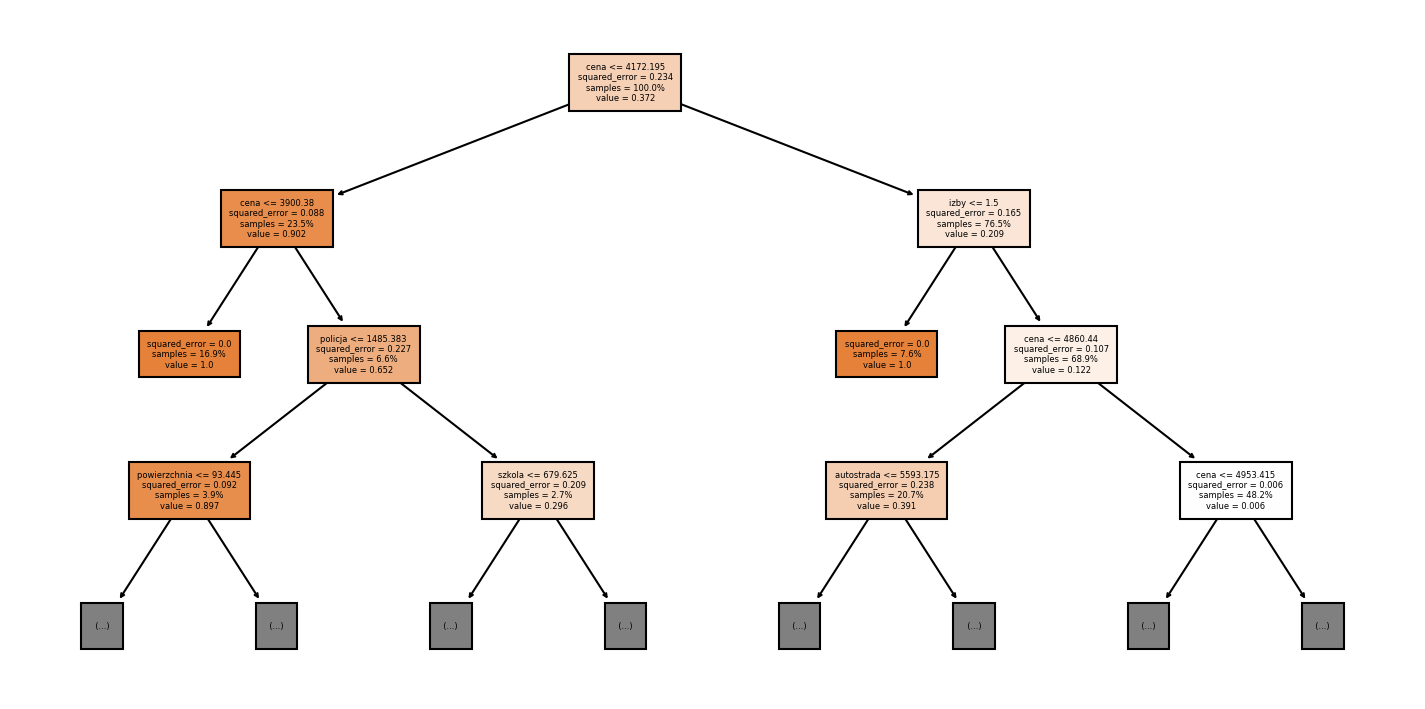

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
model = TreeReg(max_depth=9).fit(X,y)
fig,ax=plt.subplots(figsize=(12,6),dpi=150)
ann = tree.plot_tree(model,feature_names=X.columns,ax=ax,filled=True,max_depth=3,fontsize=4,proportion=True) 

In [ ]:
column_names = ['pietro', 'izby', 'powierzchnia', 'zadrzewienie', 'autostrada', 'przemysł', 'centrum', 'jezioro', 'lasy', 'tramwaj', 'policja','szkola', 'cena']
df = pd.DataFrame(model.feature_importances_.reshape(1, -1), columns=column_names)
df

,pietro,izby,powierzchnia,zadrzewienie,autostrada,przemysł,centrum,jezioro,lasy,tramwaj,policja,szkola,cena
0,0.0102,0.264529,0.024143,0.012389,0.051441,0.010906,0.008898,0.01197,0.014961,0.003614,0.033023,0.036374,0.517553


In [ ]:
#3 Zmienne o malej zaleznosci dla modelu liniowego zainter: pietro, powierzchnia, zadrzewienie, przemysl, centrum, jezioro, lasy.

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
gam = LinearGAM(s(0,n_splines=10) + s(1,n_splines=10) + s(2,n_splines=5) + s(3,n_splines=5) + s(4,n_splines=5) + s(5,n_splines=4) + s(6,n_splines=10) + s(7,n_splines=10), fit_intercept=True)
gam = LinearGAM()
gam.fit(X, y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    122.7393
Link Function:                     IdentityLink Log Likelihood:                                 -5859.7603
Number of Samples:                         1000 AIC:                                            11966.9992
                                                AICc:                                            12002.269
                                                GCV:                                                0.0717
                                                Scale:                                              0.0561
                                                Pseudo R-Squared:                                   0.7894
Feature Function                  Lam

<ipython-input-129-bb31ad4a0ac3>:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


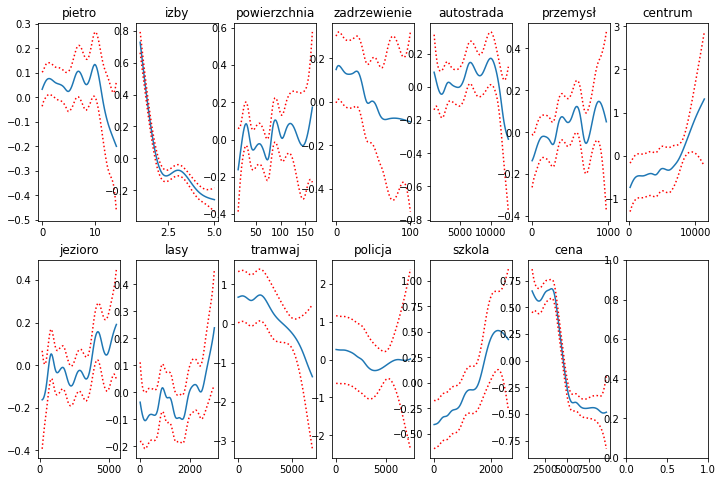

In [ ]:
fig, axes = plt.subplots(2,7,figsize=(12,8))
for t, ax in zip(range(13),axes.flatten()):
    XX = gam.generate_X_grid(term=t)
    pdp, confi = gam.partial_dependence(term=t, X=XX, width=0.95)
    ax.plot(XX.T[t],pdp)
    ax.plot(XX.T[t],confi,c="r",ls=":")
    ax.set_title(X.columns[t])

In [ ]:
#4 Zmienne zachowujace sie nieliniowo - zainter: pietro, powierzchnia, zadrzewienie, autostrada, przemysl, jezioro, lasy, szkola, cena.